## Лабораторная работа №7

Дисперсионный анализ.

### Цель работы: научиться сравнивать средние значения независимых выборок в ситуации, когда имеется более двух групп.

Имеются четыре партии сырья: A1, A2, A3, A4. Из каждой партии отобрано по пять образцов и проведены испытания на определение величины разрывной нагрузки. Необходимо на уровне значимости 5% выяснить, существенно ли влияние различных партий сырья на величину разрывной нагрузки.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_df = pd.DataFrame({'Breaking_load': [200, 140, 170, 145, 165,
                                        190, 150, 210, 150, 150,
                                        230, 190, 200, 190, 200,
                                        150, 170, 150, 170, 180],
                      'batches': np.repeat(['A1', 'A2', 'A3', 'A4'], repeats = 5)})

In [3]:
A1 = raw_df[raw_df['batches']=='A1'].Breaking_load.tolist()
A2 = raw_df[raw_df['batches']=='A2'].Breaking_load.tolist()
A3 = raw_df[raw_df['batches']=='A3'].Breaking_load.tolist()
A4 = raw_df[raw_df['batches']=='A4'].Breaking_load.tolist()

In [4]:
from pandas.core.groupby import groupby
raw_df.groupby('batches').describe()

Breaking_load                                                     
                count   mean        std    min    25%    50%    75%    max
batches                                                                   
A1                5.0  164.0  23.822258  140.0  145.0  165.0  170.0  200.0
A2                5.0  170.0  28.284271  150.0  150.0  150.0  190.0  210.0
A3                5.0  202.0  16.431677  190.0  190.0  200.0  200.0  230.0
A4                5.0  164.0  13.416408  150.0  150.0  170.0  170.0  180.0

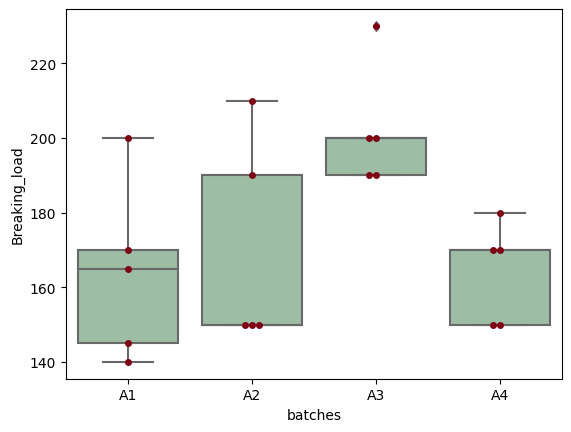

In [5]:
ax = sns.boxplot(x='batches', y='Breaking_load', data=raw_df, color='#99c2a2')
ax = sns.swarmplot(x='batches', y='Breaking_load', data=raw_df, color='#7d0013')

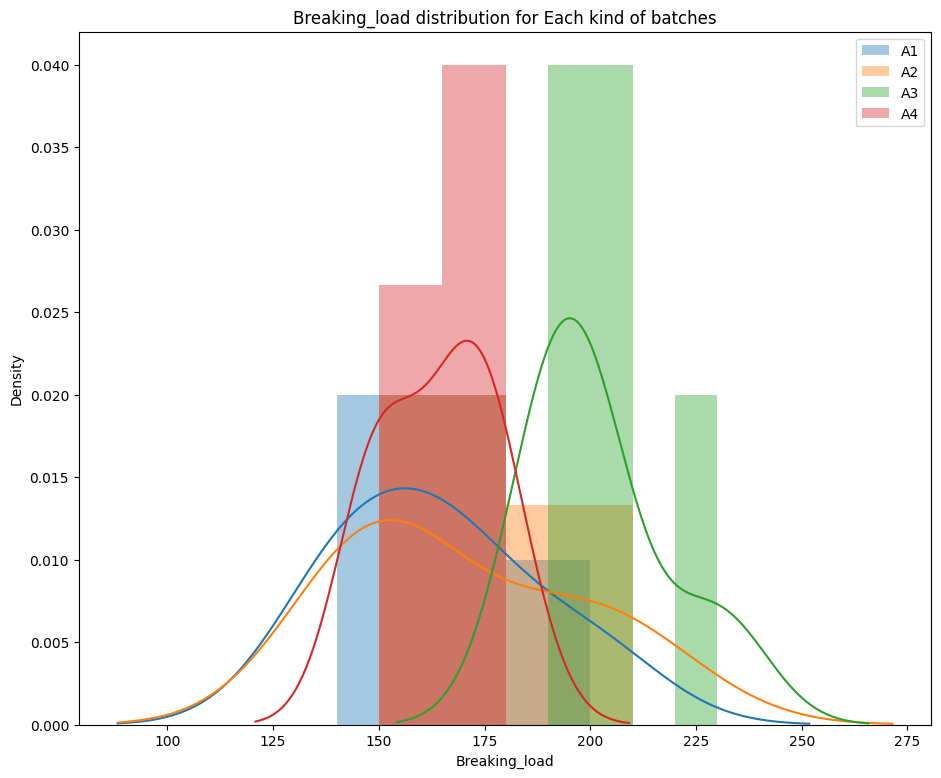

In [6]:
import warnings
warnings.filterwarnings('ignore')
f, ax = plt.subplots( figsize = (11,9))
sns.distplot(raw_df[raw_df.batches == 'A1'].Breaking_load, ax = ax, label = 'A1')
sns.distplot(raw_df[raw_df.batches == 'A2'].Breaking_load, ax = ax, label = 'A2')
sns.distplot(raw_df[raw_df.batches == 'A3'].Breaking_load, ax = ax, label = 'A3')
sns.distplot(raw_df[raw_df.batches == 'A4'].Breaking_load, ax = ax, label = 'A4')
plt.title('Breaking_load distribution for Each kind of batches' )
plt.legend()

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

In [8]:
stat, p = stats.shapiro(raw_df[raw_df.batches == 'A1'].Breaking_load) # тест Шапиро - Уилка 
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

0.586922287940979
Принять гипотезу о нормальности


In [9]:
stat, p = stats.shapiro(raw_df[raw_df.batches == 'A2'].Breaking_load) # тест Шапиро - Уилка 
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

0.04219869151711464
Отклонить гипотезу о нормальности


In [10]:
stat, p = stats.shapiro(raw_df[raw_df.batches == 'A3'].Breaking_load) # тест Шапиро - Уилка 
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

0.05367599055171013
Принять гипотезу о нормальности


In [11]:
stat, p = stats.shapiro(raw_df[raw_df.batches == 'A4'].Breaking_load) # тест Шапиро - Уилка 
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

0.20062334835529327
Принять гипотезу о нормальности


Проверка выборок на гомоскедастичность.

In [12]:
import pingouin as pg

pg.homoscedasticity(raw_df, dv='Breaking_load', group='batches', method='bartlett')

,T,pval,equal_var
bartlett,2.385365,0.496365,True


In [13]:
pg.homoscedasticity(raw_df, dv='Breaking_load', group='batches')

,W,pval,equal_var
levene,0.406892,0.750137,True


Наблюдается равенство дисперсий, условие гомоскедастичности выполняется.

In [14]:
mean_overall = (sum(A1) + sum(A2) + sum(A3) + sum(A4)) / (len(A1) + len(A2) + len(A3) + len(A4))

SST = sum((x - mean_overall) ** 2 for x in A1 + A2 + A3 + A4)
SSB = len(A1) * (sum(x for x in A1) / len(A1) - mean_overall) ** 2
SSB += len(A2) * (sum(x for x in A2) / len(A2) - mean_overall) ** 2
SSB += len(A3) * (sum(x for x in A3) / len(A3) - mean_overall) ** 2
SSB += len(A4) * (sum(x for x in A4) / len(A4) - mean_overall) ** 2

SSW = sum((x - mean) ** 2 for x in A1 for mean in [sum(A1) / len(A1)])
SSW += sum((x - mean) ** 2 for x in A2 for mean in [sum(A2) / len(A2)])
SSW += sum((x - mean) ** 2 for x in A3 for mean in [sum(A3) / len(A3)])
SSW += sum((x - mean) ** 2 for x in A4 for mean in [sum(A4) / len(A4)])

DFB = len(A1) - 1 + len(A2) - 1 + len(A3) - 1 + len(A4) - 1
DFW = len(A1) + len(A2) + len(A3) + len(A4) - 3

MSB = SSB / DFB
MSW = SSW / DFW

In [15]:
F = MSB / MSW

from scipy.stats import f

p = f.cdf(F, DFB, DFW)

In [16]:
alpha = 0.05
print(p)
if p > alpha:
    print('Принять нулевую гипотезу')
else:
    print('Отклонить нулевую гипотезу')

0.26502293161587187
Принять нулевую гипотезу


По результатам ручного расчёта параметров дисперсионного анализа, нулевая гипотеза принимается на уровне значимости 95%.

In [17]:
model = ols('Breaking_load ~ batches', data=raw_df).fit()
anova_table = sm.stats.anova_lm(model)

anova_table

,df,sum_sq,mean_sq,F,PR(>F)
batches,3.0,4980.0,1660.000,3.65337,0.035248
Residual,16.0,7270.0,454.375,NaN,NaN


In [18]:
p_value = anova_table['PR(>F)'][0]
print(p_value)

alpha = 0.05

if p_value > alpha:
    print('Принять нулевую гипотезу')
else:
    print('Отклонить нулевую гипотезу')

0.03524789929173503
Отклонить нулевую гипотезу


In [19]:
import bioinfokit
from bioinfokit.analys import stat

In [20]:
res = stat()
res.anova_stat(df=raw_df, res_var='Breaking_load', anova_model='Breaking_load ~ batches')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
batches,3.0,4980.0,1660.000,3.65337,0.035248
Residual,16.0,7270.0,454.375,NaN,NaN


Факторная дисперсия - batches, Residual - внутригрупповая.
Значение F больше 1 это значит, что изменение уровней фактора влияет на переменную отклика. Так как p - значение меньше 0,05, конкретный фактор или взаимодействие оказывают влияние.

Таким образом, с достаточно высокой степенью уверенности мы можем утверждать, что партии сырья существенно влияют на величину разрывной нагрузки.

### Проверка остатков на нормальное распределение

Text(0, 0.5, 'Standardized Residuals')

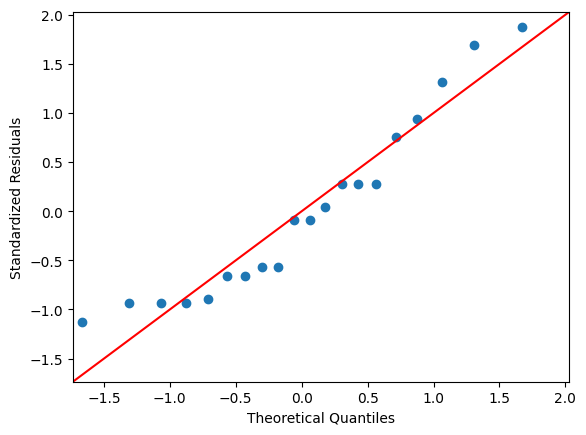

In [21]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')

Text(0, 0.5, 'Frequency')

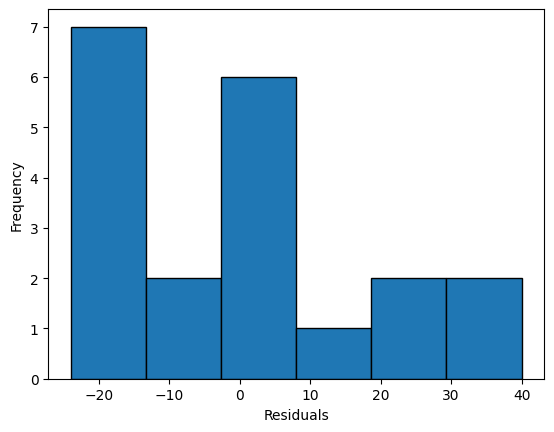

In [22]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel('Residuals')
plt.ylabel('Frequency')

In [23]:
stat, p = stats.shapiro(res.anova_std_residuals) # тест Шапиро - Уилка 
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

0.06480488181114197
Принять гипотезу о нормальности


Нормальное распределение присутствует из теста Шапиро - Уилка.

### Проведение теста Тьюки

In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=raw_df['Breaking_load'], groups=raw_df['batches'], alpha= 0.05 )

# display results
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    A1     A2      6.0 0.9696 -32.5707 44.5707  False
    A1     A3     38.0 0.0542  -0.5707 76.5707  False
    A1     A4      0.0    1.0 -38.5707 38.5707  False
    A2     A3     32.0 0.1228  -6.5707 70.5707  False
    A2     A4     -6.0 0.9696 -44.5707 32.5707  False
    A3     A4    -38.0 0.0542 -76.5707  0.5707  False
-----------------------------------------------------


Отклонение средних значений значительно для выборок A3 и A4, следовательно этого хватает для не принятия нулевой гипотезы.

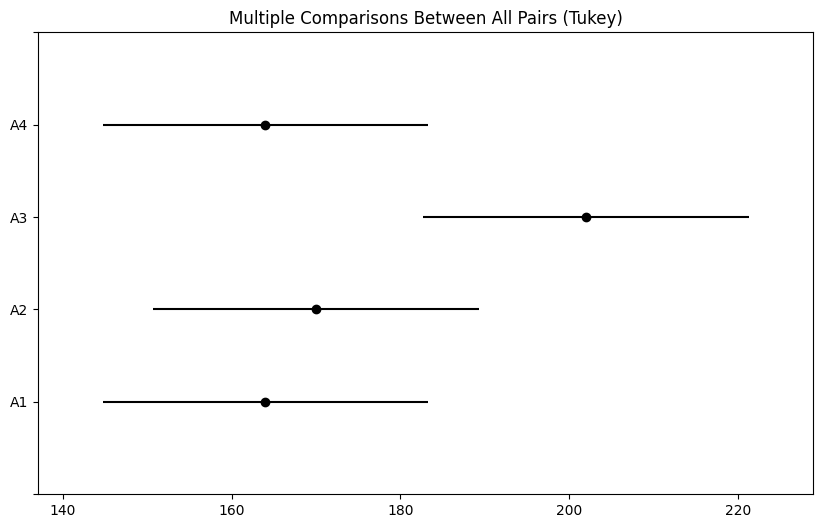

In [25]:
fig = tukey.plot_simultaneous()

In [26]:
tukey.q_crit

4.046093060626181

Text(0, 0.5, 'Frequency')

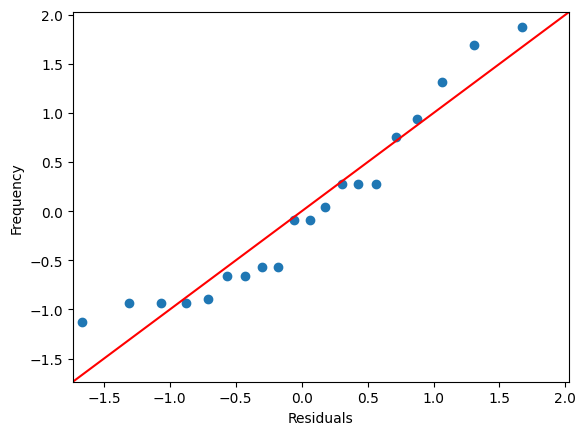

In [27]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

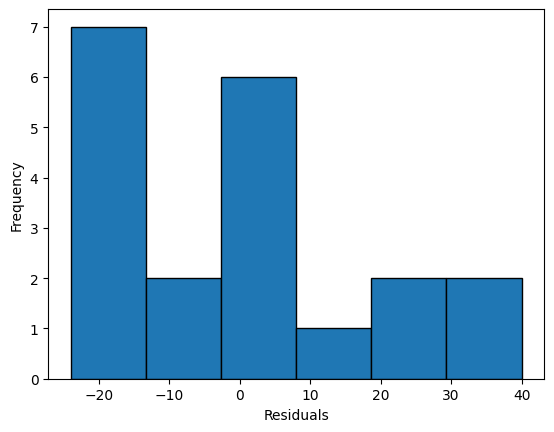

In [28]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel('Residuals')
plt.ylabel('Frequency')

In [29]:
w, pvalue = stats.shapiro(res.anova_model_out.resid)
print(w, pvalue)

0.9103792905807495 0.06480488181114197


In [30]:
from pingouin import kruskal
kruskal(data=raw_df, dv='Breaking_load', between='batches')

,Source,ddof1,H,p-unc
Kruskal,batches,3,7.090601,0.069065


Тест Крускалла - Уоллиса показывает, что можно принять нулевую гипотезу о равенстве медиан групп.

Используйте данные из лабораторной работы № 2 (выбранный вами набор данных). Выберите переменную отклика и два независимых фактора. Проведите двухфакторный дисперсионный анализ.

In [31]:
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot
import bioinfokit
from bioinfokit.analys import stat
import scikit_posthocs as sp

In [32]:
df = pd.read_csv('cardio_train.csv', delimiter = ';', low_memory=False)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Датасет о здоровых пациентах и пацентах с ССЗ.

Группы для дисперсионного анализа формируются Уровнем глюкозы и Уровнем холестерина.

Зависимый параметр - вес пациентов.

In [33]:
df = df[['gluc', 'weight', 'cholesterol']]

In [34]:
df['gluc']=df['gluc'].astype('object')

In [35]:
df['cholesterol']=df['cholesterol'].astype('object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gluc         70000 non-null  object 
 1   weight       70000 non-null  float64
 2   cholesterol  70000 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.6+ MB


In [37]:
df.describe()

,weight
count,70000.000000
mean,74.205690
std,14.395757
min,10.000000
25%,65.000000
50%,72.000000
75%,82.000000
max,200.000000


In [38]:
df['gr_ch']=df['cholesterol'].map({1:'Нормально', 2:'Выше нормы', 3:'Значительно выше нормы'})

In [39]:
df['Gluc'] = df['gluc'].map({1:'Нормально', 2:'Выше нормы', 3:'Значительно выше нормы'})

<Axes: xlabel='gr_ch', ylabel='weight'>

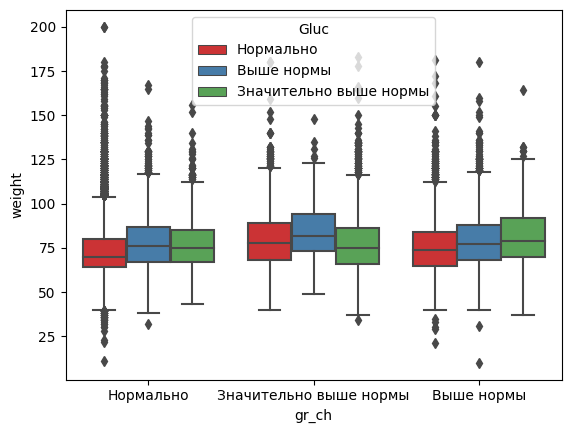

In [40]:
sns.boxplot(x='gr_ch', y='weight', hue='Gluc', data=df, palette='Set1')

<Axes: xlabel='Gluc', ylabel='weight'>

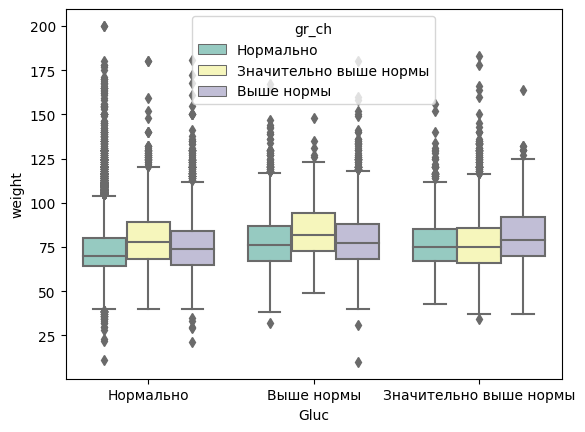

In [41]:
sns.boxplot(x='Gluc', y='weight', hue='gr_ch', data=df, palette='Set3')

Проверка на гомоскедастичность.

In [42]:
pg.homoscedasticity(df, dv='weight', group='Gluc')

,W,pval,equal_var
levene,159.991721,4.729488e-70,False


In [43]:
pg.homoscedasticity(df, dv='weight', group='Gluc', method='bartlett')

,T,pval,equal_var
bartlett,387.761854,6.289023e-85,False


Тест на гомоскедастичность показал, что данные гетероскедастичны.

In [44]:
pg.homoscedasticity(df, dv='weight', group='gr_ch')

,W,pval,equal_var
levene,236.981657,2.673339e-103,False


In [45]:
pg.homoscedasticity(df, dv='weight', group='gr_ch', method='bartlett')

,T,pval,equal_var
bartlett,474.155161,1.092736e-103,False


Тест на гомоскедастичность показал, что данные гетероскедастичны.

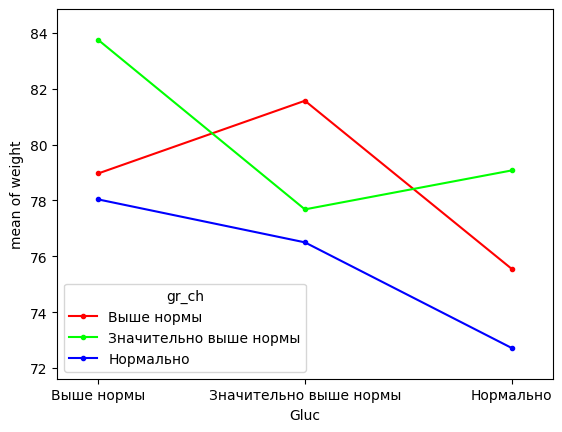

In [46]:
fig1 = interaction_plot(df['Gluc'], df['gr_ch'], df['weight']).show()

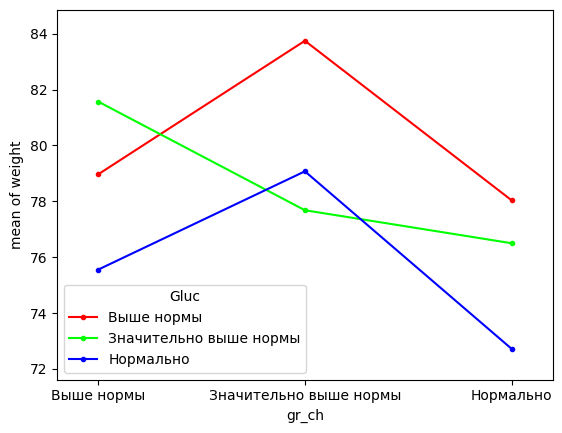

In [47]:
fig2 = interaction_plot(df['gr_ch'], df['Gluc'], df['weight']).show()

График взаимодействия помогает визуализировать взаимодействие уровня глюкозы и холестерина. Так как три линии не параллельны, то эффект между двумя факторами значителен.

In [48]:
res = stat()
res.anova_stat(df=df, res_var='gr_ch', anova_model='weight ~ gr_ch + Gluc + gr_ch:Gluc')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
gr_ch,2.0,1.703268e+05,85163.387118,423.201113,2.034812e-183
Gluc,2.0,9.028556e+04,45142.777582,224.327312,7.705682e-98
gr_ch:Gluc,4.0,3.584223e+04,8960.557036,44.527559,2.120305e-37
Residual,69991.0,1.408472e+07,201.236208,NaN,NaN


Взаимодействие между двумя факторами является значительным, поскольку значение p -  value больше 0,05.

In [49]:
res = stat()
res.anova_stat(df=df, res_var='weight', anova_model='weight ~ gr_ch + Gluc')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
gr_ch,2.0,1.703268e+05,85163.387118,422.151026,5.742043e-183
Gluc,2.0,9.028556e+04,45142.777582,223.770690,1.339657e-97
Residual,69995.0,1.412057e+07,201.736776,NaN,NaN


Остаточная вариация увеличилась незначительно. F - значения немного отличаются от предыдущих.

Делаем вывод о том, что уровень глюкозы и холестерина значительно влияет на вес.

Text(0, 0.5, 'Standardized Residuals')

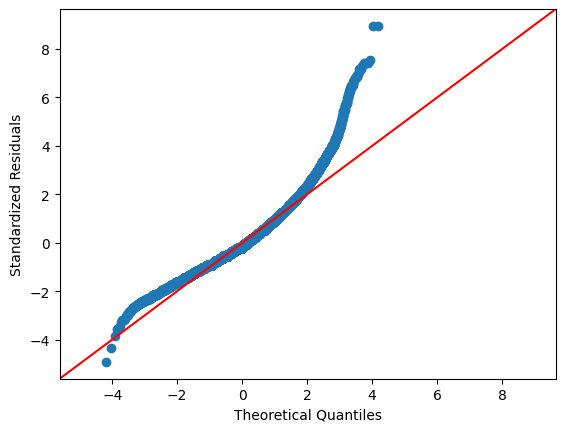

In [50]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')

In [51]:
stat, p = stats.shapiro(res.anova_std_residuals) # тест Шапиро - Уилка 
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

0.0
Отклонить гипотезу о нормальности


Text(0, 0.5, 'Frequency')

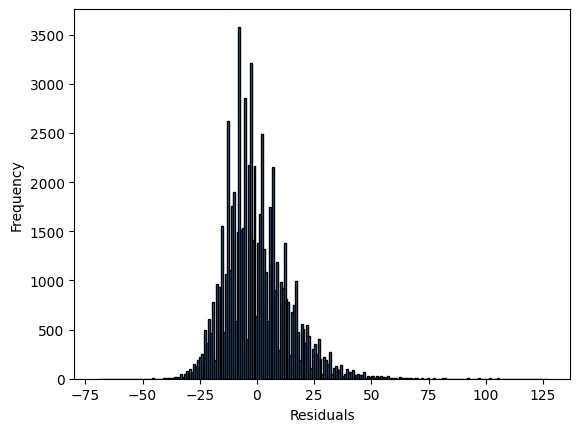

In [52]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel('Residuals')
plt.ylabel('Frequency')

### Тест Тьюки

In [53]:
tukey = pairwise_tukeyhsd(endog=df['weight'], groups=df['Gluc'], alpha= 0.05 )
print(tukey)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                 group2         meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------------------------
            Выше нормы Значительно выше нормы  -1.4107   0.0 -2.0638 -0.7577   True
            Выше нормы              Нормально  -5.5652   0.0 -6.0499 -5.0805   True
Значительно выше нормы              Нормально  -4.1544   0.0 -4.6332 -3.6756   True
-----------------------------------------------------------------------------------


In [54]:
tukey = pairwise_tukeyhsd(endog=df['weight'], groups=df['gr_ch'], alpha= 0.05 )
print(tukey)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                 group2         meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------------------------
            Выше нормы Значительно выше нормы   2.1066   0.0  1.6016  2.6116   True
            Выше нормы              Нормально  -3.6126   0.0 -3.9842  -3.241   True
Значительно выше нормы              Нормально  -5.7192   0.0 -6.1187 -5.3198   True
-----------------------------------------------------------------------------------


Анализ множественных попарных сравнений (постфактум сравнения) для всех сравнений с использованием теста Тьюки на достоверно значимые различия (HSD) говорит о том, что абсолютное значение разницы средних значений двух групп меньше HSD. Делаем вывод, что разница является незначимой и отвергаем нулевую гипотезу.

In [55]:
aov = pg.anova(dv='weight', between=['gr_ch', 'Gluc'], data=df, detailed=True)
print(aov)

         Source            SS       DF            MS           F  \
0         gr_ch  1.703268e+05      2.0  85163.387118  423.201113   
1          Gluc  9.028556e+04      2.0  45142.777582  224.327312   
2  gr_ch * Gluc  3.584223e+04      4.0   8960.557036   44.527559   
3      Residual  1.408472e+07  69991.0    201.236208         NaN   

           p-unc       np2  
0  2.034812e-183  0.011949  
1   7.705682e-98  0.006369  
2   2.120305e-37  0.002538  
3            NaN       NaN  


In [56]:
pg.friedman(data=df, dv='weight', within='Gluc', subject='gr_ch')

,Source,W,ddof1,Q,p-unc
Friedman,Gluc,0.444444,2,2.666667,0.263597


In [57]:
pg.friedman(data=df, dv='weight', within='gr_ch', subject='Gluc')

,Source,W,ddof1,Q,p-unc
Friedman,gr_ch,0.777778,2,4.666667,0.096972


Тест Фридмана показывает значительные различия в весе в зависимости от уровня холестерина и глюкозы, когда источником является атрибут gr_ch.

# Вывод:

Выполнен расчёт однофакторного дисперсионного анализа вручную и при помощи библиотек, а также оценка результатов анализа.

Выполнен расчёт двухфакторного дисперсионного анализа и оценка его результатов.

В обоих задачах нулевая гипотеза была отвергнута на основе различных тестов.